# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['XLA_FLAGS'] = "--xla_disable_hlo_passes=constant_folding"
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jaxquantum.codes as jqtb
import jaxquantum as jqt
import jaxquantum.circuits as jqtc
import matplotlib.pyplot as plt
from tqdm import tqdm
import jax
import numpy as np
from jax_tqdm import scan_tqdm
from jaxopt import GaussNewton
from sbs import sbs
plt.style.use('ggplot')

/home/rolleri/.conda/envs/jax-sims/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# No Bit-Flip

In [3]:
N = 500
delta = 0.3
gkp_qubit = jqtb.GKPQubit({"delta": delta, "N": N})
gkp = jqt.basis(2, 0) ^ gkp_qubit.basis["+z"]

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c318f3490>)

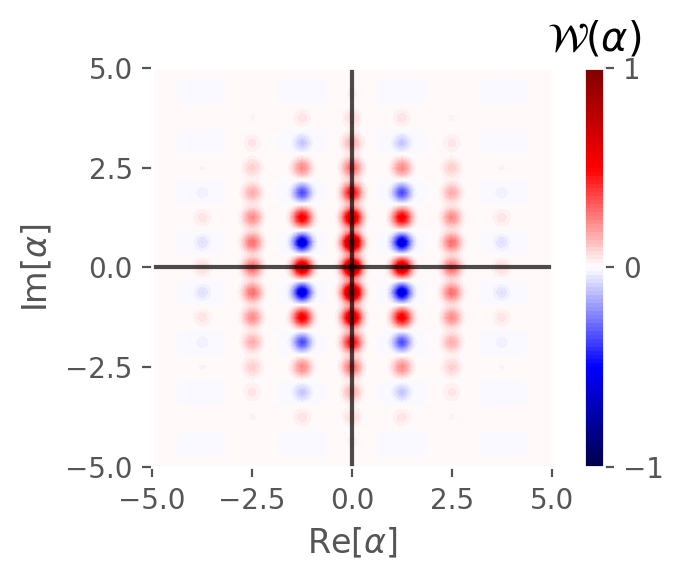

In [4]:
pts = jnp.linspace(-5, 5, 100)
jqt.plot_wigner(gkp.ptrace(1), pts)

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c31940790>)

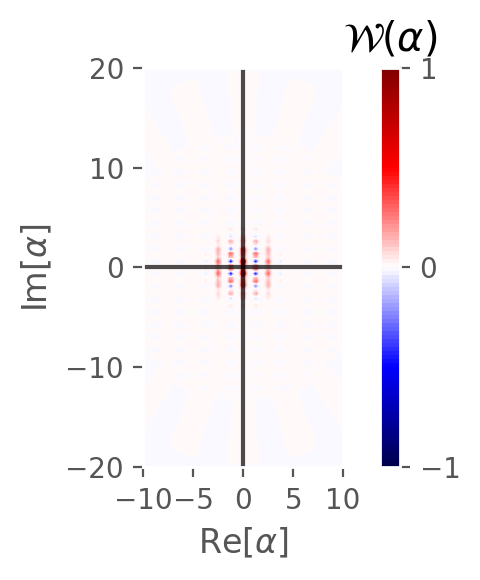

In [5]:
pts_x = jnp.linspace(-10, 10, 100)
pts_y = jnp.linspace(-20, 20, 100)
jqt.plot_wigner(gkp.ptrace(1), pts_x, pts_y)

In [6]:
alpha = 10.5j
displaced = (jqt.identity(2) ^ jqtc.displace(N, alpha)) @ gkp

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x154b0abd67d0>)

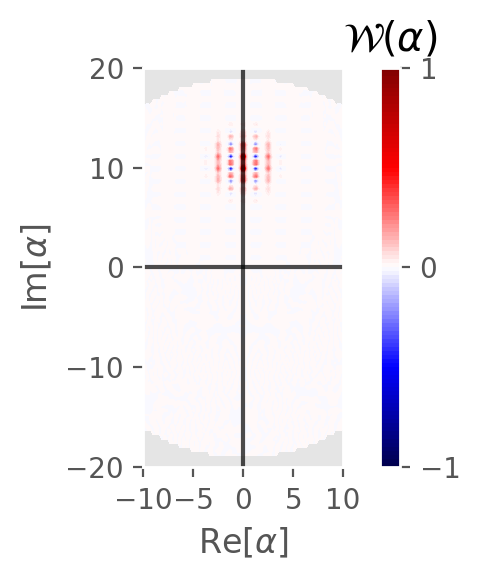

In [8]:
jqt.plot_wigner(displaced.ptrace(1), pts_x, pts_y)

In [13]:
chi = 17e3*2*jnp.pi
t_CD = 1.361e-6/2
theta = chi*t_CD

In [21]:
after_first_CR = jqtc.CR(N, theta).U @ displaced

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c0ba20150>)

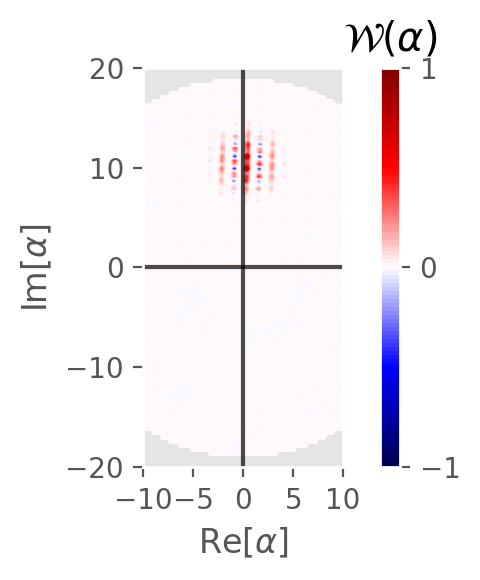

In [22]:
jqt.plot_wigner(after_first_CR.ptrace(1), pts_x, pts_y)

In [25]:
after_big_displace = (jqt.identity(2) ^ jqt.displace(N, -alpha)) @ (jqt.sigmax() ^ jqt.identity(N)) @ (jqt.identity(2) ^ jqt.displace(N, -alpha)) @ after_first_CR

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c0b9e8390>)

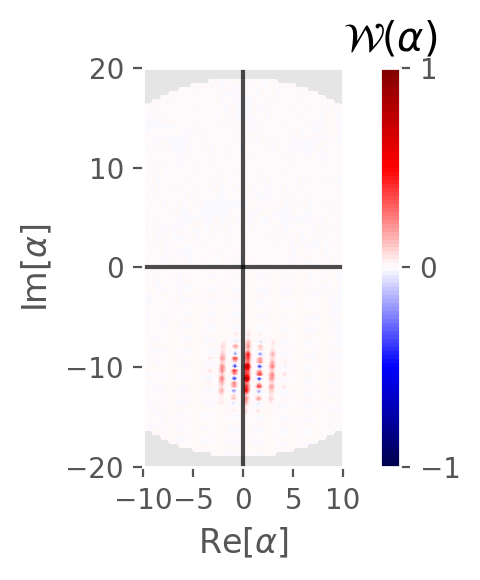

In [26]:
jqt.plot_wigner(after_big_displace.ptrace(1), pts_x, pts_y)

In [27]:
after_second_CR = jqtc.CR(N, theta).U @ after_big_displace

ERROR! Session/line number was not unique in database. History logging moved to new session 1323


(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c0940c2d0>)

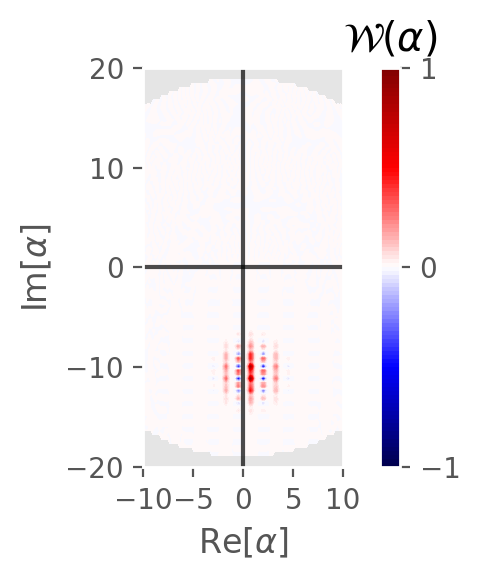

In [29]:
jqt.plot_wigner(after_second_CR.ptrace(1), pts_x, pts_y)

In [30]:
final_state = (jqt.identity(2) ^ jqt.displace(N, alpha)) @ after_second_CR

ERROR! Session/line number was not unique in database. History logging moved to new session 1324


(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c08684550>)

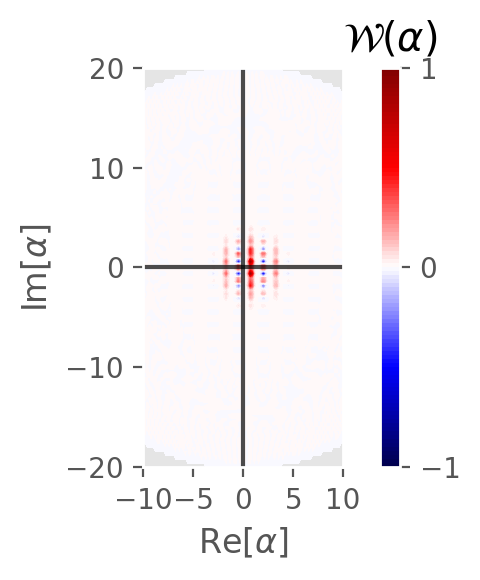

In [31]:
jqt.plot_wigner(final_state.ptrace(1), pts_x, pts_y)

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c09b68e10>)

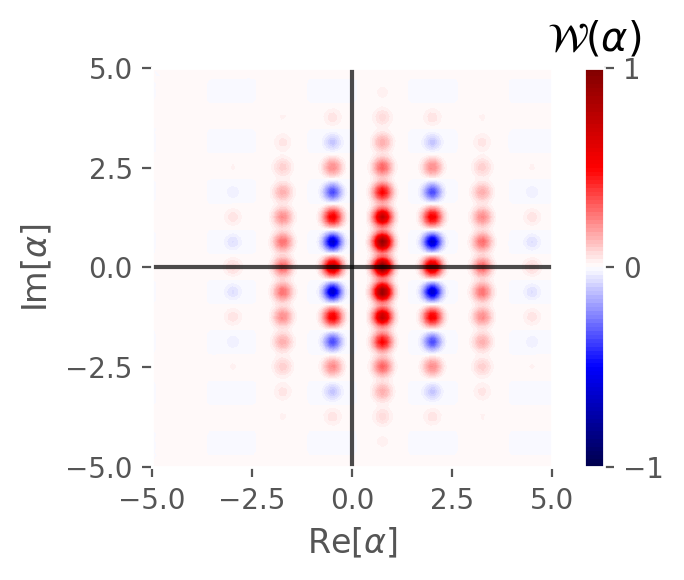

In [32]:
jqt.plot_wigner(final_state.ptrace(1), pts)

# Bit-Flip

In [33]:
N = 500
delta = 0.3
gkp_qubit = jqtb.GKPQubit({"delta": delta, "N": N})
gkp = jqt.basis(2, 0) ^ gkp_qubit.basis["+z"]

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c08360150>)

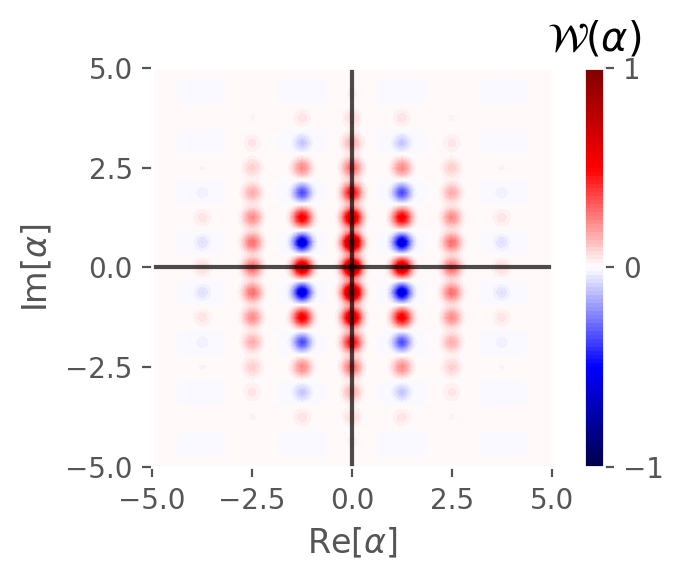

In [34]:
pts = jnp.linspace(-5, 5, 100)
jqt.plot_wigner(gkp.ptrace(1), pts)

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c082442d0>)

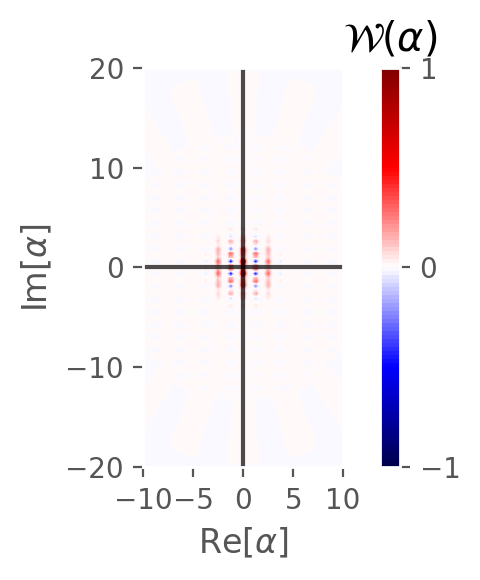

In [35]:
pts_x = jnp.linspace(-10, 10, 100)
pts_y = jnp.linspace(-20, 20, 100)
jqt.plot_wigner(gkp.ptrace(1), pts_x, pts_y)

In [36]:
alpha = 10.5j
displaced = (jqt.identity(2) ^ jqtc.displace(N, alpha)) @ gkp

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c08e17590>)

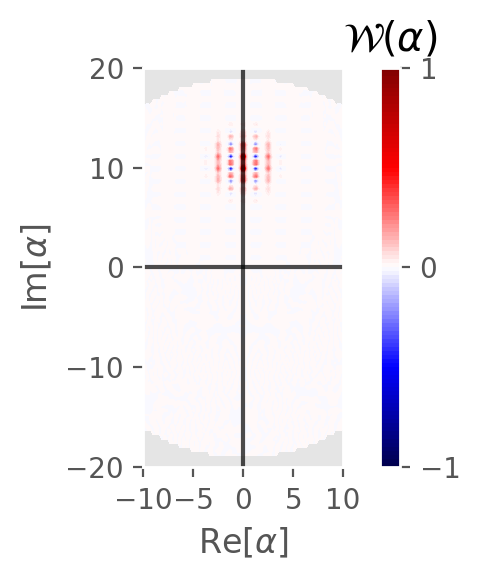

In [37]:
jqt.plot_wigner(displaced.ptrace(1), pts_x, pts_y)

In [38]:
chi = 17e3*2*jnp.pi
t_CD = 1.361e-6/2
theta = chi*t_CD

In [39]:
tau = theta * 2 / 3

In [40]:
after_first_CR = jqtc.CR(N, theta-tau).U @ (jqt.sigmax() ^ jqt.identity(N)) @ jqtc.CR(N, tau).U @ displaced

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c0bdb7350>)

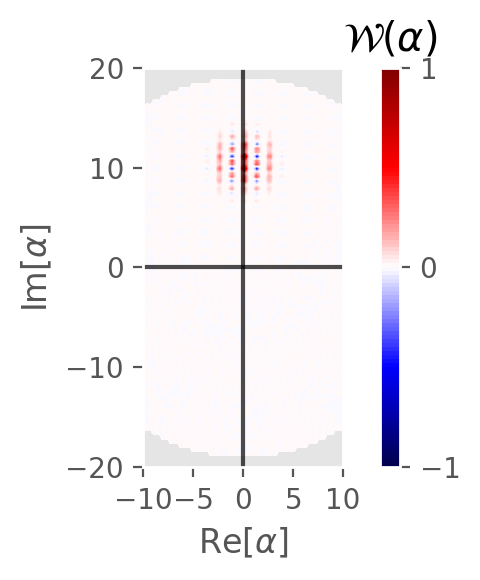

In [41]:
jqt.plot_wigner(after_first_CR.ptrace(1), pts_x, pts_y)

In [42]:
after_big_displace = (jqt.identity(2) ^ jqt.displace(N, -alpha)) @ (jqt.sigmax() ^ jqt.identity(N)) @ (jqt.identity(2) ^ jqt.displace(N, -alpha)) @ after_first_CR

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c0bc96790>)

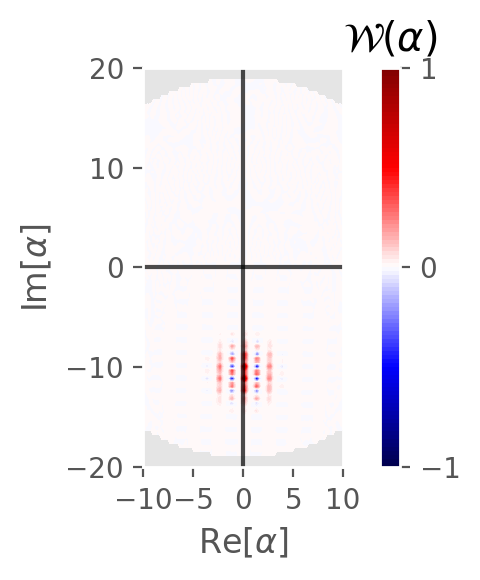

In [43]:
jqt.plot_wigner(after_big_displace.ptrace(1), pts_x, pts_y)

In [44]:
after_second_CR = jqtc.CR(N, theta).U @ after_big_displace

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c0b74bf10>)

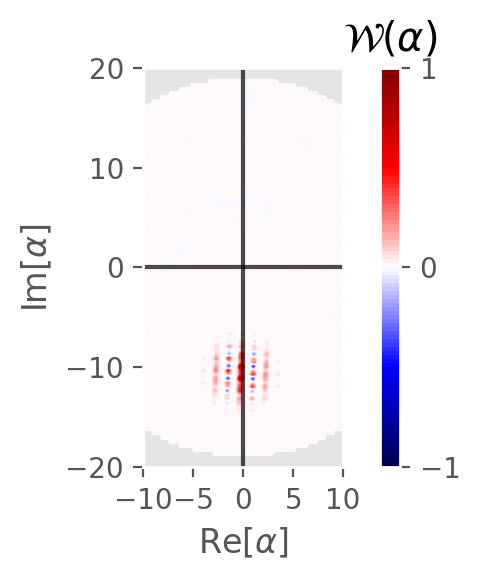

In [45]:
jqt.plot_wigner(after_second_CR.ptrace(1), pts_x, pts_y)

In [46]:
final_state = (jqt.identity(2) ^ jqt.displace(N, alpha)) @ after_second_CR

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c0af1e0d0>)

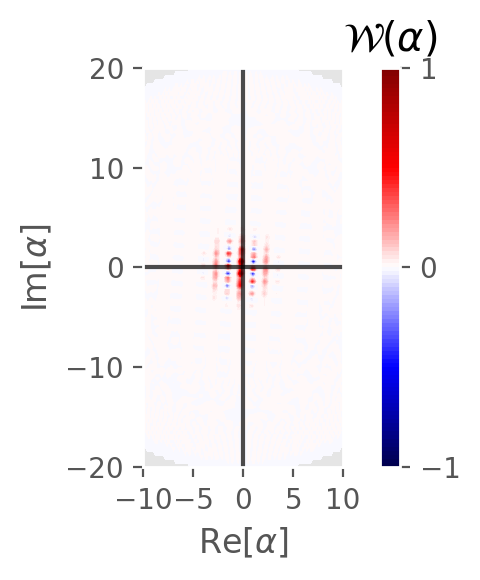

In [47]:
jqt.plot_wigner(final_state.ptrace(1), pts_x, pts_y)

(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x152c0bb3d350>)

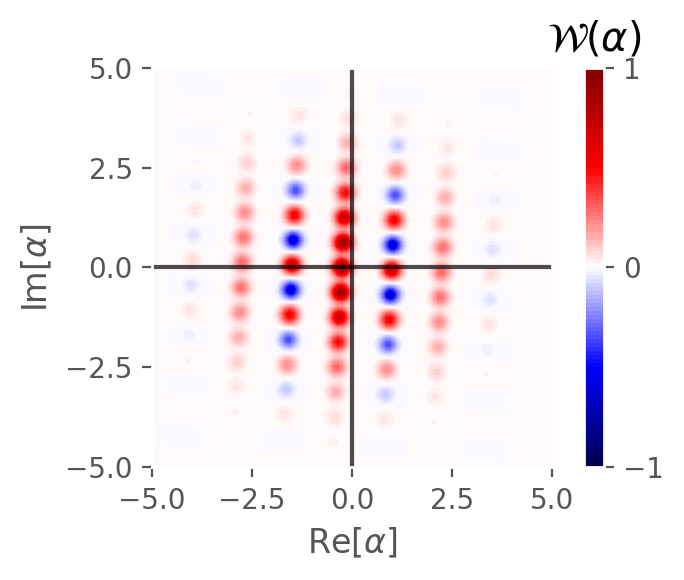

In [48]:
jqt.plot_wigner(final_state.ptrace(1), pts)